# Task 2 - Prediction of store sales


Prediction of sales is the central task in this challenge. you want to predict daily sales in
various stores up to 6 weeks ahead of time. This will help the company plan ahead of
time.


In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy in c:\adv_proj_rossman_sales_project\rossman_sales_prediction_nexthikes\venv\lib\site-packages (1.24.3)




[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [6]:
file_path = r"C:\Adv_proj_Rossman_sales_project\rossman_sales_prediction_nexthikes\data\train_data_merged.csv"
train_data = pd.read_csv(file_path)




In [7]:
test_data = pd.read_csv(r"C:\Adv_proj_Rossman_sales_project\rossman_sales_prediction_nexthikes\data\test_data_merged.csv")


In [8]:
train_data.shape

(1017209, 19)

In [9]:
test_data.shape

(41088, 18)

# 2.1 Preprocessing

#### It is important to process the data into a format where it can be fed to a machine learning model. This typically means converting all non-numeric columns to numeric, handling NaN values and generating new features from already existing features.

In [10]:
train_data.head()

,Unnamed: 0,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Unnamed: 0                 1017209 non-null  int64  
 1   Store                      1017209 non-null  int64  
 2   DayOfWeek                  1017209 non-null  int64  
 3   Date                       1017209 non-null  object 
 4   Sales                      1017209 non-null  int64  
 5   Customers                  1017209 non-null  int64  
 6   Open                       1017209 non-null  int64  
 7   Promo                      1017209 non-null  int64  
 8   StateHoliday               1017209 non-null  object 
 9   SchoolHoliday              1017209 non-null  int64  
 10  StoreType                  1017209 non-null  object 
 11  Assortment                 1017209 non-null  object 
 12  CompetitionDistance        1014567 non-null  float64
 13  CompetitionO

In [12]:
test_data.head()

,Unnamed: 0,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 41088 non-null  int64  
 1   Id                         41088 non-null  int64  
 2   Store                      41088 non-null  int64  
 3   DayOfWeek                  41088 non-null  int64  
 4   Date                       41088 non-null  object 
 5   Open                       41077 non-null  float64
 6   Promo                      41088 non-null  int64  
 7   StateHoliday               41088 non-null  object 
 8   SchoolHoliday              41088 non-null  int64  
 9   StoreType                  41088 non-null  object 
 10  Assortment                 41088 non-null  object 
 11  CompetitionDistance        40992 non-null  float64
 12  CompetitionOpenSinceMonth  25872 non-null  float64
 13  CompetitionOpenSinceYear   25872 non-null  flo

In [14]:
# Remove unnecessary columns
train_data.drop(columns=["Unnamed: 0"], inplace=True)
test_data.drop(columns=["Unnamed: 0"], inplace=True)

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [16]:
# Handling missing values
imputer = SimpleImputer(strategy="mean")
columns_with_missing = ["CompetitionDistance", "CompetitionOpenSinceMonth", 
                        "CompetitionOpenSinceYear", "Promo2SinceWeek", "Promo2SinceYear"]
train_data[columns_with_missing] = imputer.fit_transform(train_data[columns_with_missing])
test_data[columns_with_missing] = imputer.transform(test_data[columns_with_missing])

In [17]:
# Handling missing values
imputer = SimpleImputer(strategy="mean")
columns_with_missing = ["CompetitionDistance", "CompetitionOpenSinceMonth", 
                        "CompetitionOpenSinceYear", "Promo2SinceWeek", "Promo2SinceYear"]
train_data[columns_with_missing] = imputer.fit_transform(train_data[columns_with_missing])
test_data[columns_with_missing] = imputer.transform(test_data[columns_with_missing])

In [18]:
# Convert categorical columns to strings
categorical_cols = ["StateHoliday", "StoreType", "Assortment", "PromoInterval"]
for col in categorical_cols:
    train_data[col] = train_data[col].astype(str)
    test_data[col] = test_data[col].astype(str)

In [19]:
# Encoding categorical variables
label_encoder = LabelEncoder()
for col in categorical_cols:
    train_data[col] = label_encoder.fit_transform(train_data[col])
    test_data[col] = label_encoder.transform(test_data[col])


In [20]:
# Scaling numerical features
scaler = StandardScaler()
numerical_cols = ["CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear",
                  "Promo2SinceWeek", "Promo2SinceYear"]
train_data[numerical_cols] = scaler.fit_transform(train_data[numerical_cols])
test_data[numerical_cols] = scaler.transform(test_data[numerical_cols])


In [21]:
# Handling missing values for "Open" column in test data
test_data["Open"].fillna(0, inplace=True)


In [22]:
# Convert "Date" column to datetime
train_data["Date"] = pd.to_datetime(train_data["Date"])
test_data["Date"] = pd.to_datetime(test_data["Date"])

# Extract features from "Date" column
train_data["Year"] = train_data["Date"].dt.year
train_data["Month"] = train_data["Date"].dt.month
train_data["Day"] = train_data["Date"].dt.day

test_data["Year"] = test_data["Date"].dt.year
test_data["Month"] = test_data["Date"].dt.month
test_data["Day"] = test_data["Date"].dt.day

In [23]:
# Drop the original "Date" column
train_data.drop(columns=["Date"], inplace=True)
test_data.drop(columns=["Date"], inplace=True)

In [24]:
train_data.head()


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,5263,555,1,1,0,1,2,0,-0.539900,0.669941,-0.139458,0,2.849875e-15,-3.865293e-13,3,2015,7,31
1,2,5,6064,625,1,1,0,1,0,0,-0.630746,1.423898,-0.341504,1,-1.029693e+00,-1.489835e+00,1,2015,7,31
2,3,5,8314,821,1,1,0,1,0,0,1.129083,1.800876,-0.543550,1,-9.294219e-01,-6.398482e-01,1,2015,7,31
3,4,5,13995,1498,1,1,0,1,2,2,-0.624257,0.669941,0.062588,0,2.849875e-15,-3.865293e-13,3,2015,7,31
4,5,5,4822,559,1,1,0,1,0,0,3.177025,-1.214950,1.274865,0,2.849875e-15,-3.865293e-13,3,2015,7,31


In [25]:
test_data.head()

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,1,4,1.0,1,0,0,2,0,-0.539900,0.669941,-0.139458,0,2.849875e-15,-3.865293e-13,3,2015,9,17
1,2,3,4,1.0,1,0,0,0,0,1.129083,1.800876,-0.543550,1,-9.294219e-01,-6.398482e-01,1,2015,9,17
2,3,7,4,1.0,1,0,0,0,2,2.410020,-1.214950,0.870773,0,2.849875e-15,-3.865293e-13,3,2015,9,17
3,4,8,4,1.0,1,0,0,0,0,0.271231,1.046919,1.072819,0,2.849875e-15,-3.865293e-13,3,2015,9,17
4,5,9,4,1.0,1,0,0,0,2,-0.441266,0.292963,-1.755827,0,2.849875e-15,-3.865293e-13,3,2015,9,17


In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  int32  
 7   SchoolHoliday              1017209 non-null  int64  
 8   StoreType                  1017209 non-null  int32  
 9   Assortment                 1017209 non-null  int32  
 10  CompetitionDistance        1017209 non-null  float64
 11  CompetitionOpenSinceMonth  1017209 non-null  float64
 12  CompetitionOpenSinceYear   1017209 non-null  float64
 13  Promo2      

In [27]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Open                       41088 non-null  float64
 4   Promo                      41088 non-null  int64  
 5   StateHoliday               41088 non-null  int32  
 6   SchoolHoliday              41088 non-null  int64  
 7   StoreType                  41088 non-null  int32  
 8   Assortment                 41088 non-null  int32  
 9   CompetitionDistance        41088 non-null  float64
 10  CompetitionOpenSinceMonth  41088 non-null  float64
 11  CompetitionOpenSinceYear   41088 non-null  float64
 12  Promo2                     41088 non-null  int64  
 13  Promo2SinceWeek            41088 non-null  flo

In [28]:
# Convert "Year", "Month", and "Day" columns to datetime
train_data["Date"] = pd.to_datetime(train_data[["Year", "Month", "Day"]])
test_data["Date"] = pd.to_datetime(test_data[["Year", "Month", "Day"]])

In [29]:
# Extract additional features from "Date" column for train_data
train_data["Weekday"] = train_data["Date"].dt.weekday
train_data["IsWeekend"] = (train_data["Weekday"] >= 5).astype(int)
train_data["DaysToHoliday"] = (train_data["Date"] - pd.to_datetime("2023-08-27")).dt.days
train_data["DaysAfterHoliday"] = (pd.to_datetime("2023-08-27") - train_data["Date"]).dt.days
train_data["IsBeginningOfMonth"] = (train_data["Day"] <= 10).astype(int)
train_data["IsMidMonth"] = ((train_data["Day"] > 10) & (train_data["Day"] <= 20)).astype(int)
train_data["IsEndOfMonth"] = (train_data["Day"] > 20).astype(int)
# Extract more features from "Date" column for train_data
train_data["IsMonthStart"] = train_data["Date"].dt.is_month_start.astype(int)
train_data["IsMonthEnd"] = train_data["Date"].dt.is_month_end.astype(int)
train_data["WeekOfYear"] = train_data["Date"].dt.isocalendar().week
train_data["Quarter"] = train_data["Date"].dt.quarter
train_data["DaysSinceStart"] = (train_data["Date"] - train_data["Date"].min()).dt.days



In [30]:
# Extract additional features from "Date" column for test_data
test_data["Weekday"] = test_data["Date"].dt.weekday
test_data["IsWeekend"] = (test_data["Weekday"] >= 5).astype(int)
test_data["DaysToHoliday"] = (test_data["Date"] - pd.to_datetime("2023-08-27")).dt.days
test_data["DaysAfterHoliday"] = (pd.to_datetime("2023-08-27") - test_data["Date"]).dt.days
test_data["IsBeginningOfMonth"] = (test_data["Day"] <= 10).astype(int)
test_data["IsMidMonth"] = ((test_data["Day"] > 10) & (test_data["Day"] <= 20)).astype(int)
test_data["IsEndOfMonth"] = (test_data["Day"] > 20).astype(int)
test_data["IsMonthStart"] = test_data["Date"].dt.is_month_start.astype(int)
test_data["IsMonthEnd"] = test_data["Date"].dt.is_month_end.astype(int)
test_data["WeekOfYear"] = test_data["Date"].dt.isocalendar().week
test_data["Quarter"] = test_data["Date"].dt.quarter
test_data["DaysSinceStart"] = (test_data["Date"] - test_data["Date"].min()).dt.days

In [31]:
# Drop the "Date" column
train_data.drop(columns=["Date"], inplace=True)
test_data.drop(columns=["Date"], inplace=True)


In [32]:
train_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,DaysToHoliday,DaysAfterHoliday,IsBeginningOfMonth,IsMidMonth,IsEndOfMonth,IsMonthStart,IsMonthEnd,WeekOfYear,Quarter,DaysSinceStart
0,1,5,5263,555,1,1,0,1,2,0,...,-2949,2949,0,0,1,0,1,31,3,941
1,2,5,6064,625,1,1,0,1,0,0,...,-2949,2949,0,0,1,0,1,31,3,941
2,3,5,8314,821,1,1,0,1,0,0,...,-2949,2949,0,0,1,0,1,31,3,941
3,4,5,13995,1498,1,1,0,1,2,2,...,-2949,2949,0,0,1,0,1,31,3,941
4,5,5,4822,559,1,1,0,1,0,0,...,-2949,2949,0,0,1,0,1,31,3,941


In [33]:
test_data.head()

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,DaysToHoliday,DaysAfterHoliday,IsBeginningOfMonth,IsMidMonth,IsEndOfMonth,IsMonthStart,IsMonthEnd,WeekOfYear,Quarter,DaysSinceStart
0,1,1,4,1.0,1,0,0,2,0,-0.539900,...,-2901,2901,0,1,0,0,0,38,3,47
1,2,3,4,1.0,1,0,0,0,0,1.129083,...,-2901,2901,0,1,0,0,0,38,3,47
2,3,7,4,1.0,1,0,0,0,2,2.410020,...,-2901,2901,0,1,0,0,0,38,3,47
3,4,8,4,1.0,1,0,0,0,0,0.271231,...,-2901,2901,0,1,0,0,0,38,3,47
4,5,9,4,1.0,1,0,0,0,2,-0.441266,...,-2901,2901,0,1,0,0,0,38,3,47


In [34]:
train_data.shape

(1017209, 32)

In [35]:
test_data.shape

(41088, 31)

In [36]:


# Save manipulated data back to CSV files
train_data.to_csv("modified_train.csv", index=False)
test_data.to_csv("modified_test.csv", index=False)


In [37]:
test_data.columns

Index(['Id', 'Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'Day', 'Weekday', 'IsWeekend', 'DaysToHoliday', 'DaysAfterHoliday',
       'IsBeginningOfMonth', 'IsMidMonth', 'IsEndOfMonth', 'IsMonthStart',
       'IsMonthEnd', 'WeekOfYear', 'Quarter', 'DaysSinceStart'],
      dtype='object')

# 2.2 Building models with sklearn pipelines

In [38]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [40]:
# Splitting the data into features (X) and target (y)
X = train_data.drop(['Sales', 'Customers'], axis=1)
y = train_data['Sales']

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Create a LinearRegression model
model = LinearRegression()



In [42]:
# Fit the model on the training data
model.fit(X_train, y_train)



LinearRegression()

In [43]:
# Make predictions on the validation data
y_pred_linear = model.predict(X_val)



In [44]:
# Calculate Mean Squared Error (MSE) loss
mse_loss = mean_squared_error(y_val, y_pred_linear)



In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [46]:
# Calculate Mean Absolute Error (MAE) loss
mae_loss = mean_absolute_error(y_val, y_pred_linear)

# Print the calculated losses
print("Mean Squared Error (MSE):", mse_loss)
print("Mean Absolute Error (MAE):", mae_loss)

Mean Squared Error (MSE): 6490909.558724354
Mean Absolute Error (MAE): 1768.6102869613944


In [47]:
pip install mlflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
import mlflow
import mlflow.sklearn


In [49]:
# Define categorical and numerical columns
categorical_cols = ["StoreType", "Assortment"]
numerical_cols = ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 
                  'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day', 
                  'Weekday', 'IsWeekend', 'DaysToHoliday', 'DaysAfterHoliday', 'IsBeginningOfMonth',
                  'IsMidMonth', 'IsEndOfMonth', 'IsMonthStart', 'IsMonthEnd', 'WeekOfYear', 
                  'Quarter', 'DaysSinceStart']

In [50]:

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', 'passthrough', categorical_cols)
    ])

In [56]:

import mlflow
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Start an MLflow run
with mlflow.start_run() as run:
    # Log hyperparameters
    mlflow.log_param('random_state', 42)
    
    # Create a pipeline with RandomForestRegressor
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(random_state=42))
    ])
    
    # Fit the pipeline
    pipeline.fit(X_train, y_train)

    # Log metrics
    y_pred_rf = pipeline.predict(X_val)
    mse_loss_rf = mean_squared_error(y_val, y_pred_rf)
    mae_loss_rf = mean_absolute_error(y_val, y_pred_rf)
    mlflow.log_metric('mse_loss', mse_loss_rf)
    mlflow.log_metric('mae_loss', mae_loss_rf)

    # Log the trained model
    mlflow.sklearn.log_model(pipeline, 'rossman_sales_model')
    
    # Print the run ID for reference
    print("MLflow run ID:", run.info.run_id)


2023/08/29 01:04:48 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\manil\AppData\Local\Temp\tmpij0dcgvq\model\model.pkl, flavor: sklearn), fall back to return ['scikit-learn==1.3.0', 'cloudpickle==2.2.1']. Set logging level to DEBUG to see the full traceback.


MLflow run ID: 5c7486e2f8464629945cb4a56a2225c6


In [61]:
import os
# Log the trained model
mlflow.sklearn.log_model(pipeline, 'rossman_sales_model')

# Print the run ID for reference
print("MLflow run ID:", run.info.run_id)

# Get the artifact path for the logged model
model_artifact_path = f"models/rossman_sales_model/{run.info.run_id}/artifacts"
artifact_uri = mlflow.get_artifact_uri("5c7486e2f8464629945cb4a56a2225c6")
artifact_full_path = os.path.join(artifact_uri, model_artifact_path)
print("Model artifact URI:", artifact_full_path)



2023/08/29 01:15:57 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\manil\AppData\Local\Temp\tmpee1hccry\model\model.pkl, flavor: sklearn), fall back to return ['scikit-learn==1.3.0', 'cloudpickle==2.2.1']. Set logging level to DEBUG to see the full traceback.


MLflow run ID: 5c7486e2f8464629945cb4a56a2225c6
Model artifact URI: file:///c:/Adv_proj_Rossman_sales_project/rossman_sales_prediction_nexthikes/mlruns/0/b49db154c6f54a7dad172e9a7939e9f2/artifacts/5c7486e2f8464629945cb4a56a2225c6\models/rossman_sales_model/5c7486e2f8464629945cb4a56a2225c6/artifacts


# 2.3 Choose a loss function

In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, log_loss, hinge_loss

In [63]:
# Predict using the pipeline
y_pred_rf = pipeline.predict(X_val)

# Calculate Mean Squared Error (MSE) loss
mse_loss_rf = mean_squared_error(y_val, y_pred_rf)

# Calculate Mean Absolute Error (MAE) loss
mae_loss_rf = mean_absolute_error(y_val, y_pred_rf)



In [64]:
y_pred_linear = model.predict(X_val)

# Calculate Mean Squared Error (MSE) loss
mse_loss_linear = mean_squared_error(y_val, y_pred_linear)

# Calculate Mean Absolute Error (MAE) loss
mae_loss_linear = mean_absolute_error(y_val, y_pred_linear)


               Model      MSE Loss     MAE Loss
0  Linear Regression  6.490910e+06  1768.610287
1      Random Forest  1.886560e+06   763.309333


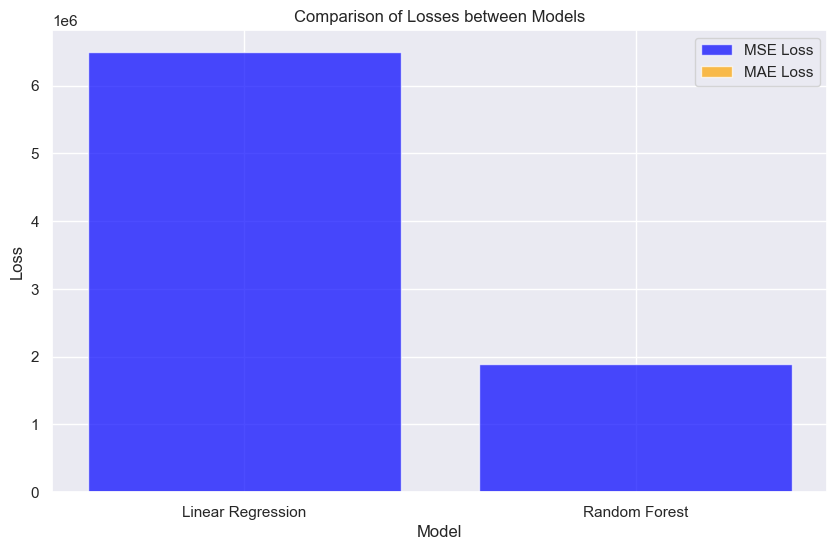

In [65]:
# Create a DataFrame to store the loss values
loss_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MSE Loss': [mse_loss_linear, mse_loss_rf],
    'MAE Loss': [mae_loss_linear, mae_loss_rf]
})

# Print the loss DataFrame
print(loss_df)

# Plotting the losses
plt.figure(figsize=(10, 6))
plt.bar(loss_df['Model'], loss_df['MSE Loss'], color='blue', alpha=0.7, label='MSE Loss')
plt.bar(loss_df['Model'], loss_df['MAE Loss'], color='orange', alpha=0.7, label='MAE Loss')
plt.xlabel('Model')
plt.ylabel('Loss')
plt.title('Comparison of Losses between Models')
plt.legend()
plt.grid(True)
plt.show()

# 2.4 Post Prediction analysis


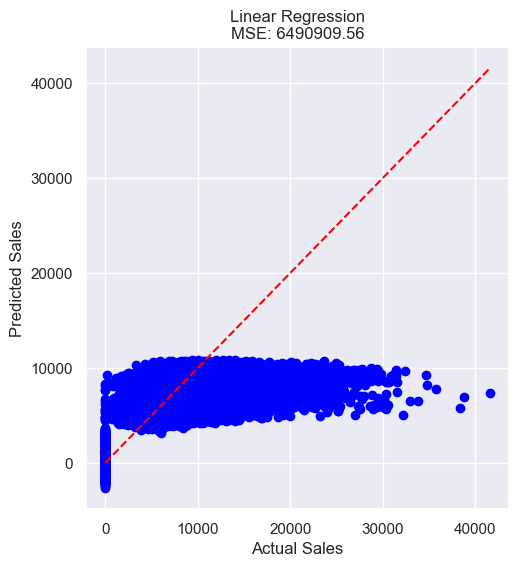

In [66]:
# Plotting the post-prediction analysis
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_pred_linear, color='blue')
plt.plot([0, max(y_val)], [0, max(y_val)], color='red', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression\nMSE: {:.2f}'.format(mse_loss_linear))
plt.grid(True)

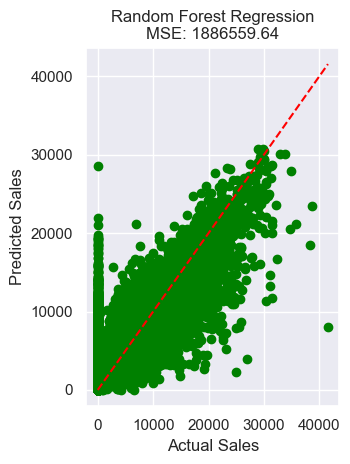

In [67]:
plt.subplot(1, 2, 2)
plt.scatter(y_val, y_pred_rf, color='green')
plt.plot([0, max(y_val)], [0, max(y_val)], color='red', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Random Forest Regression\nMSE: {:.2f}'.format(mse_loss_rf))
plt.grid(True)

plt.tight_layout()
plt.show()

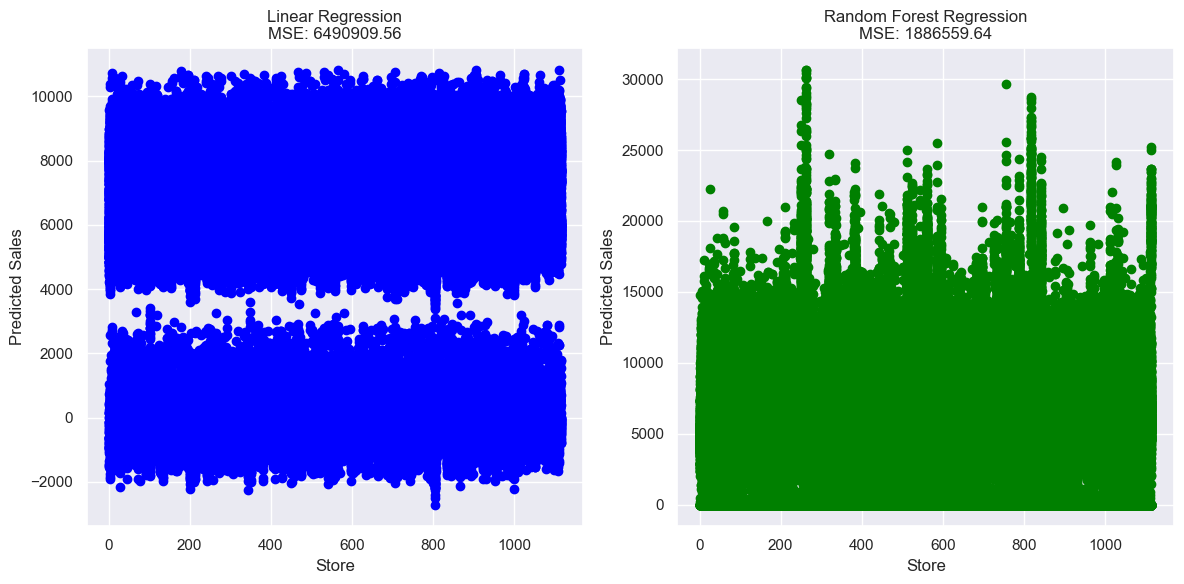

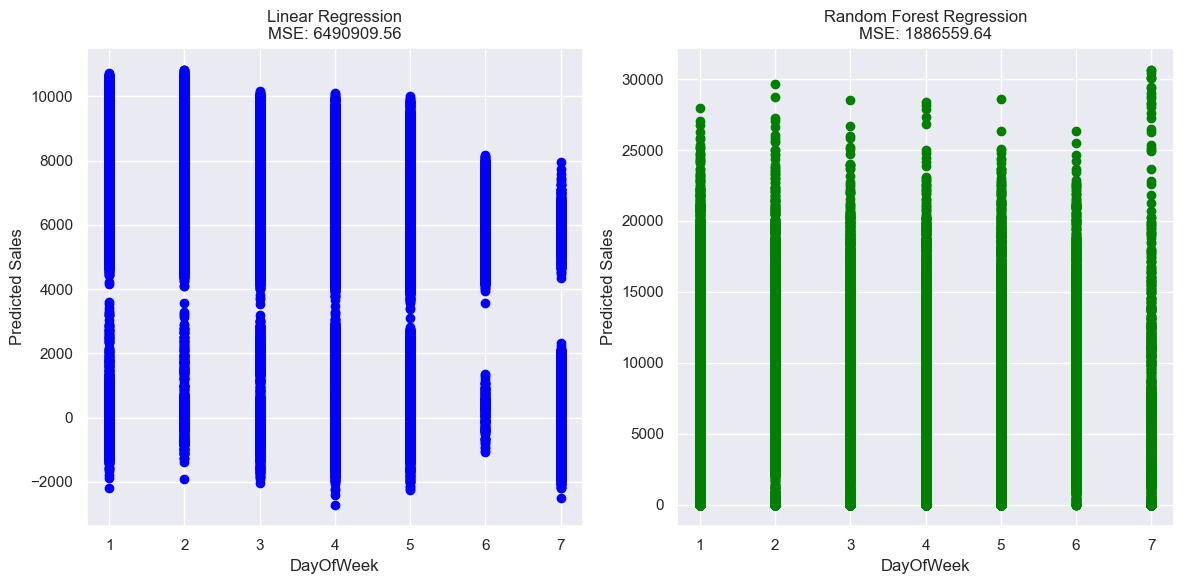

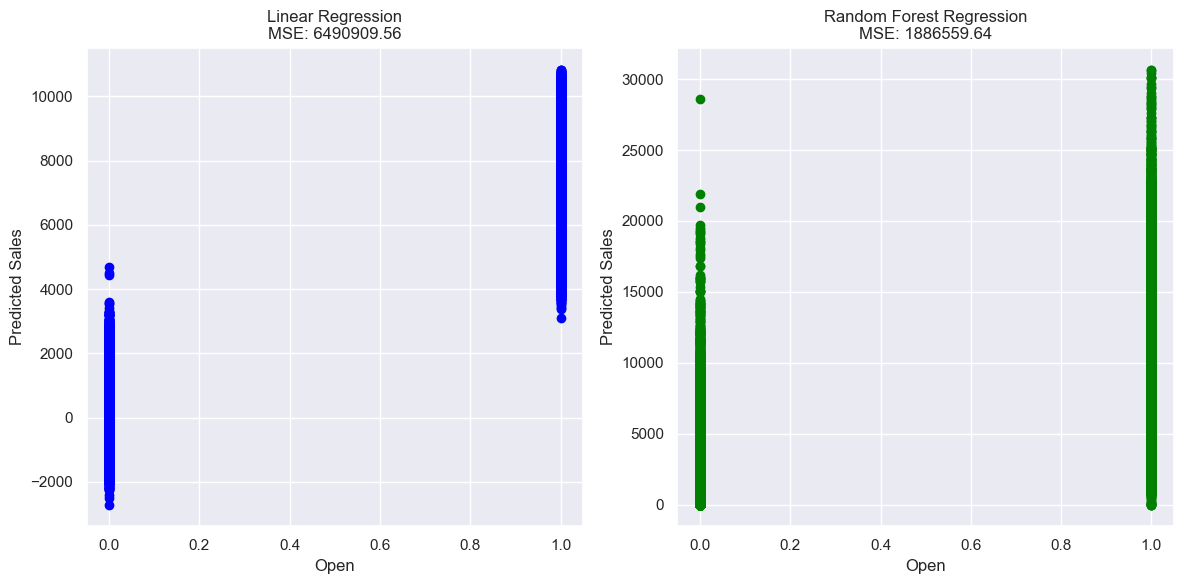

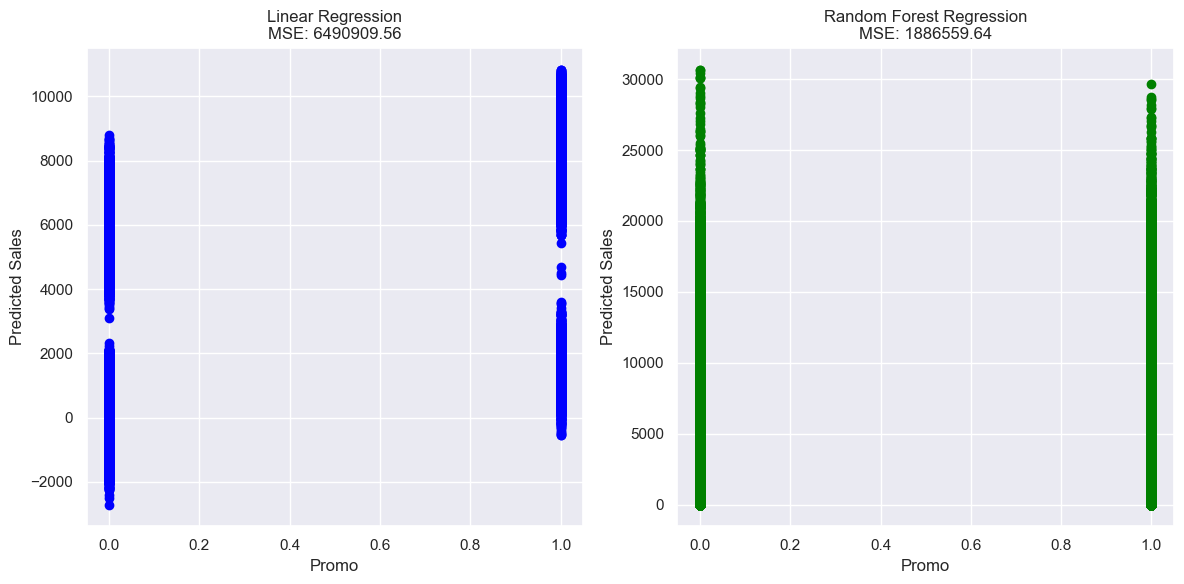

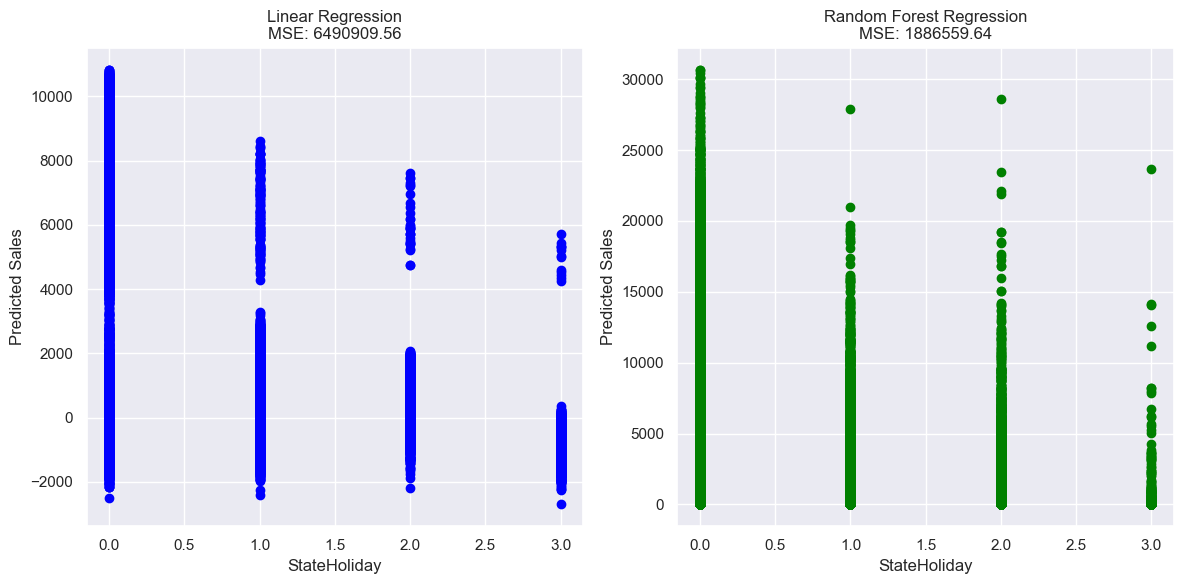

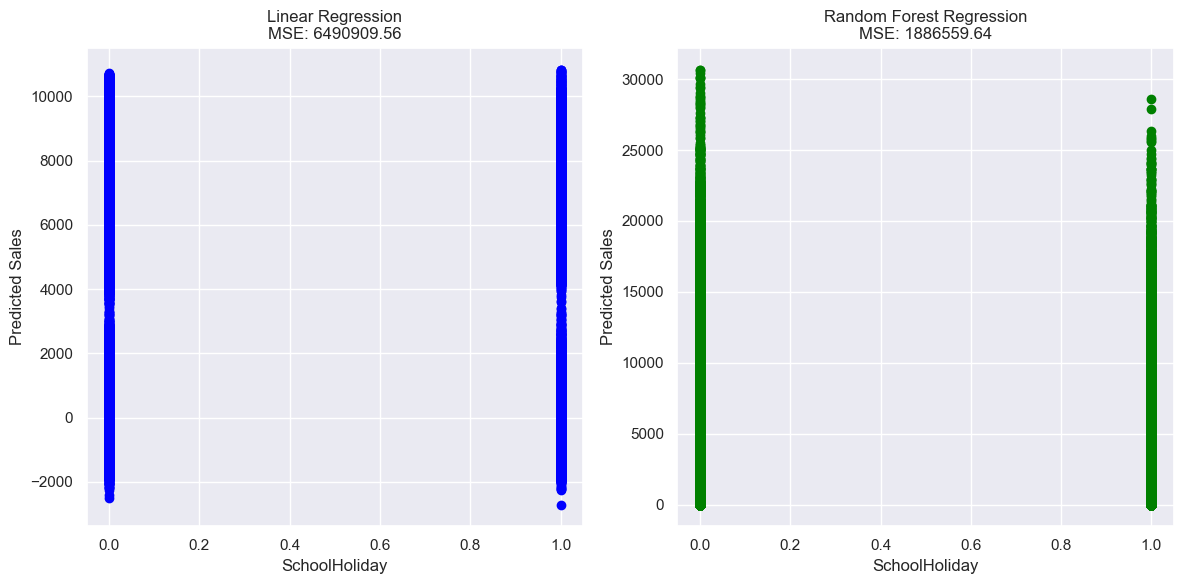

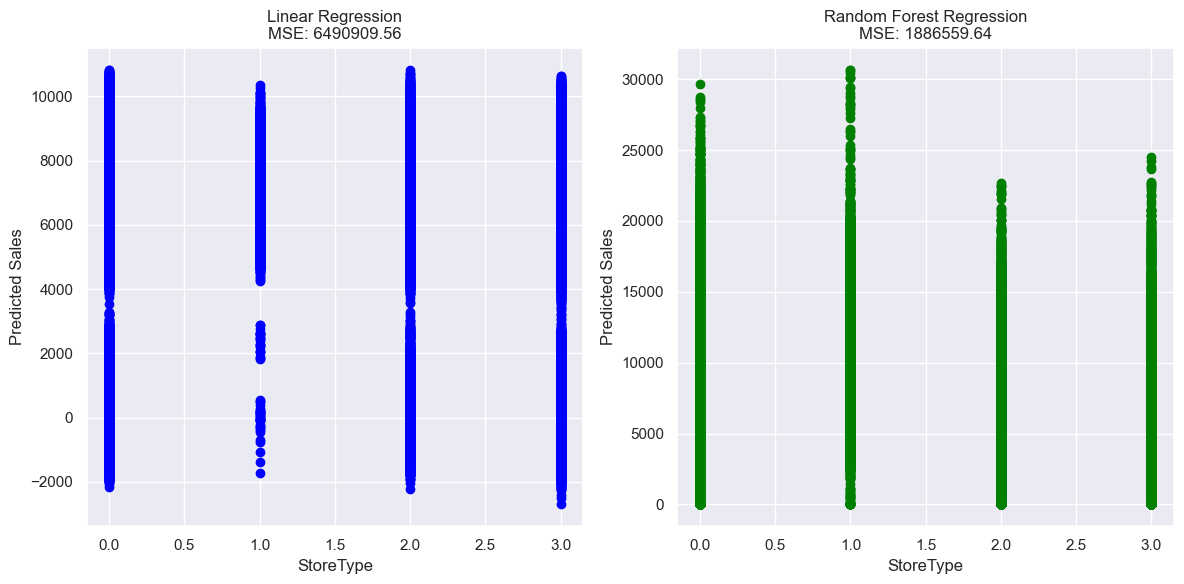

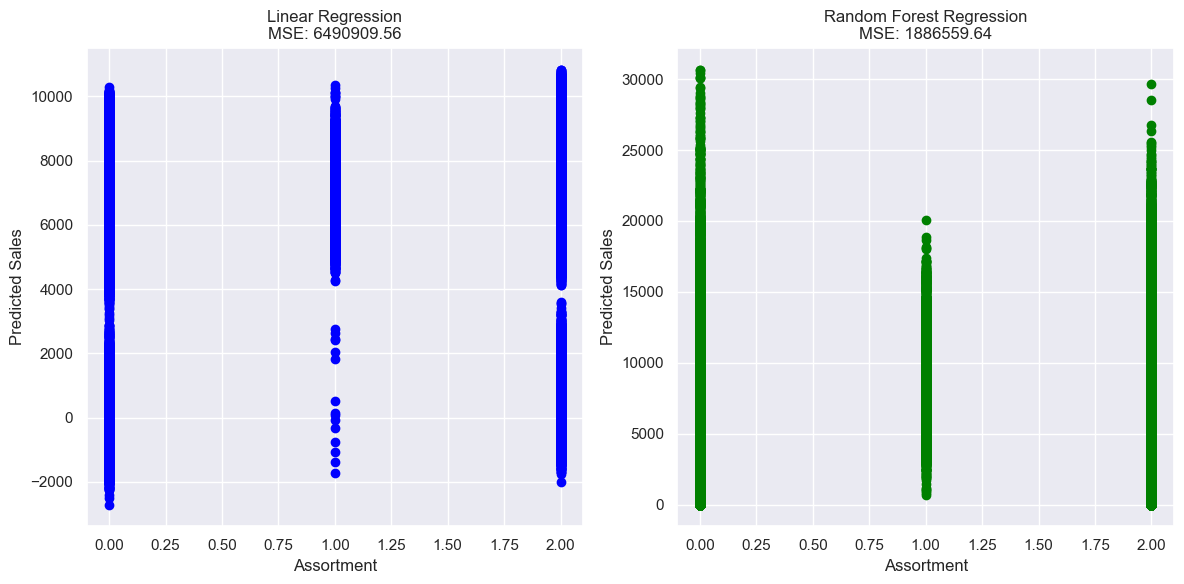

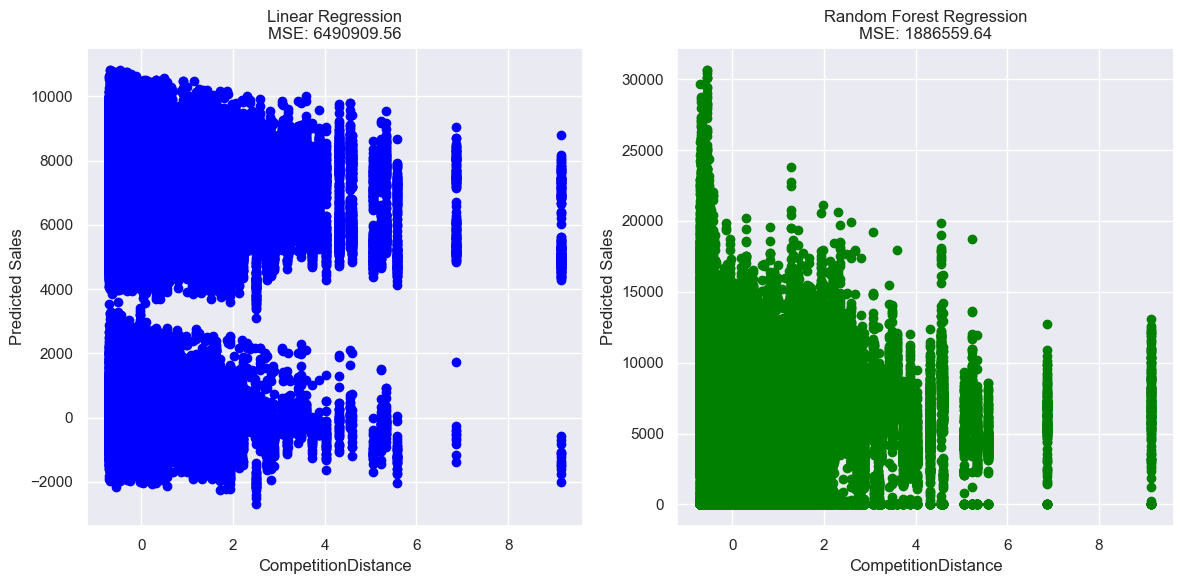

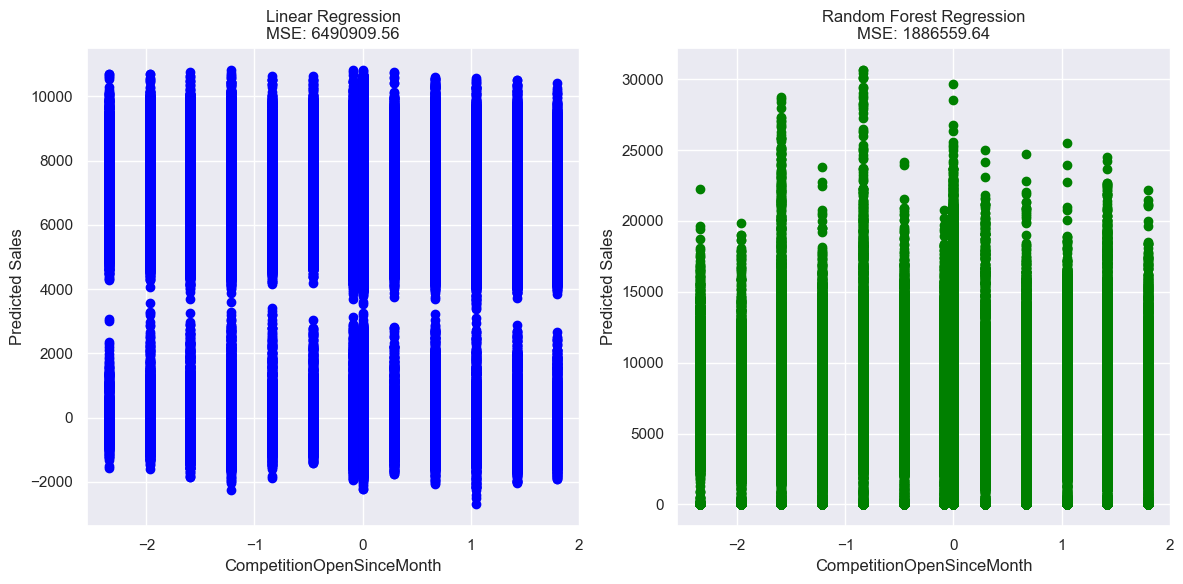

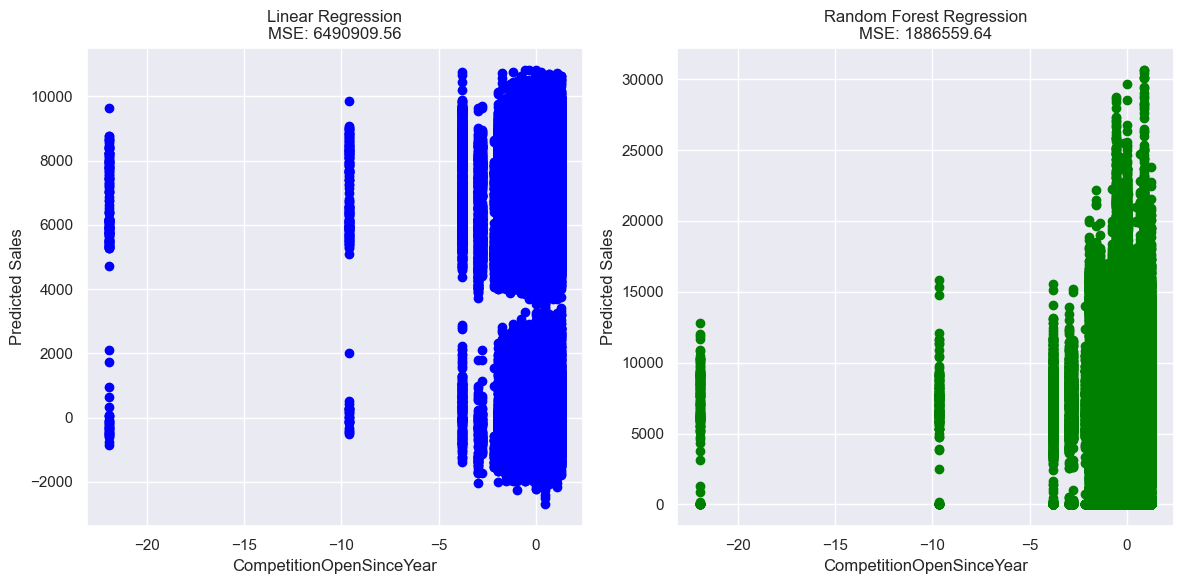

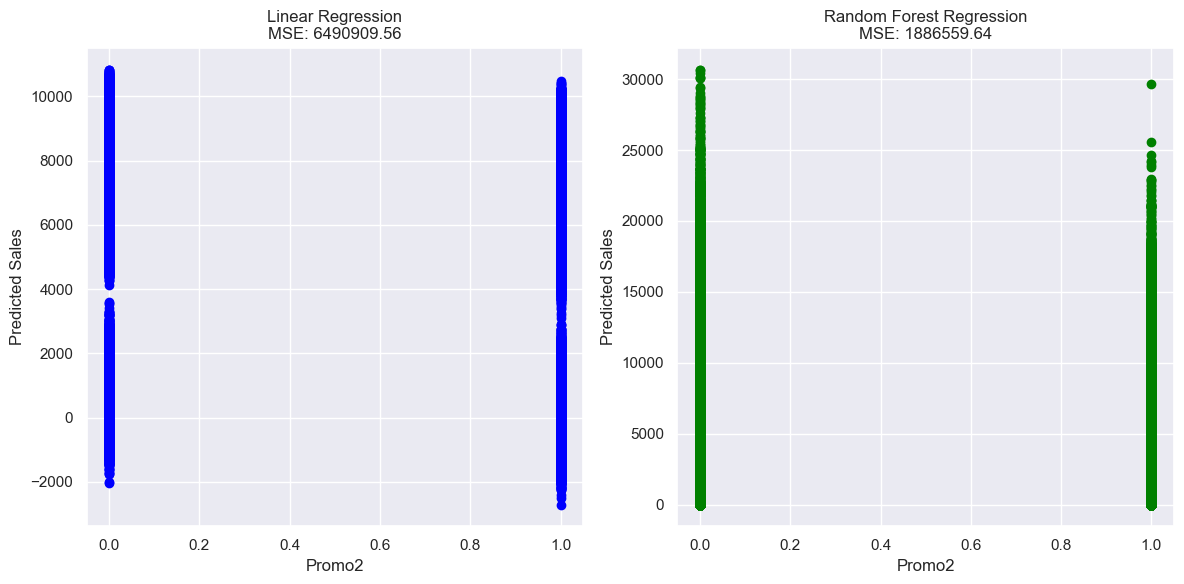

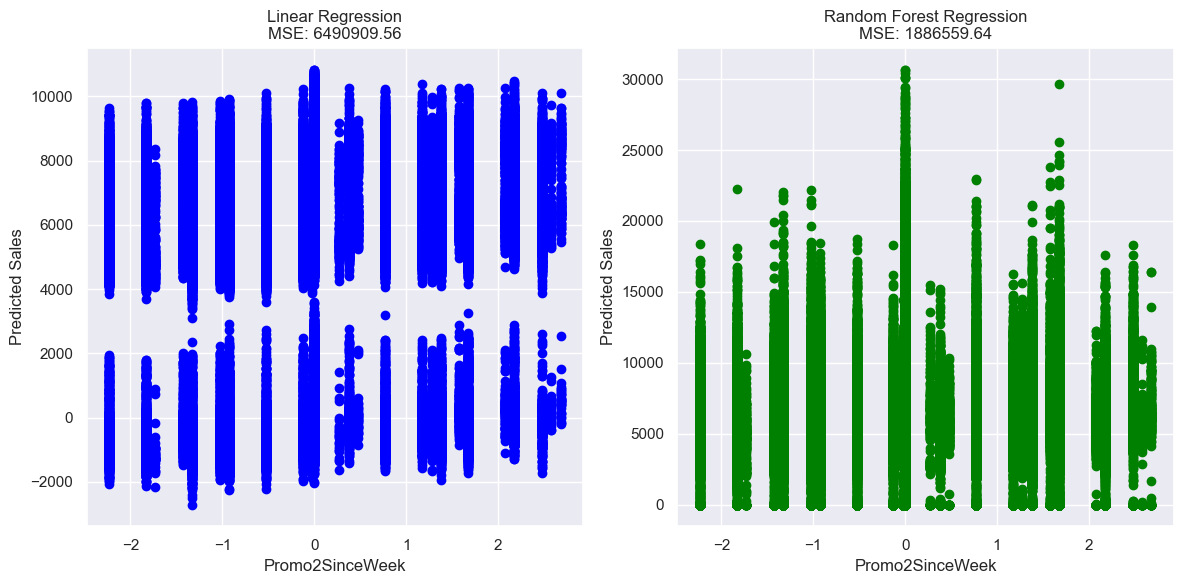

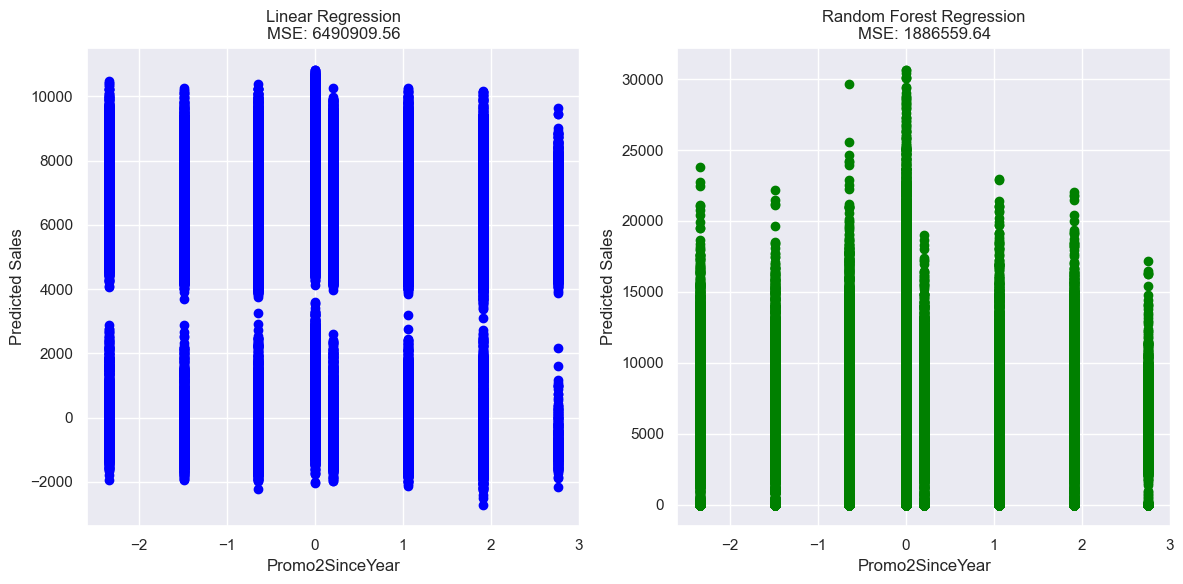

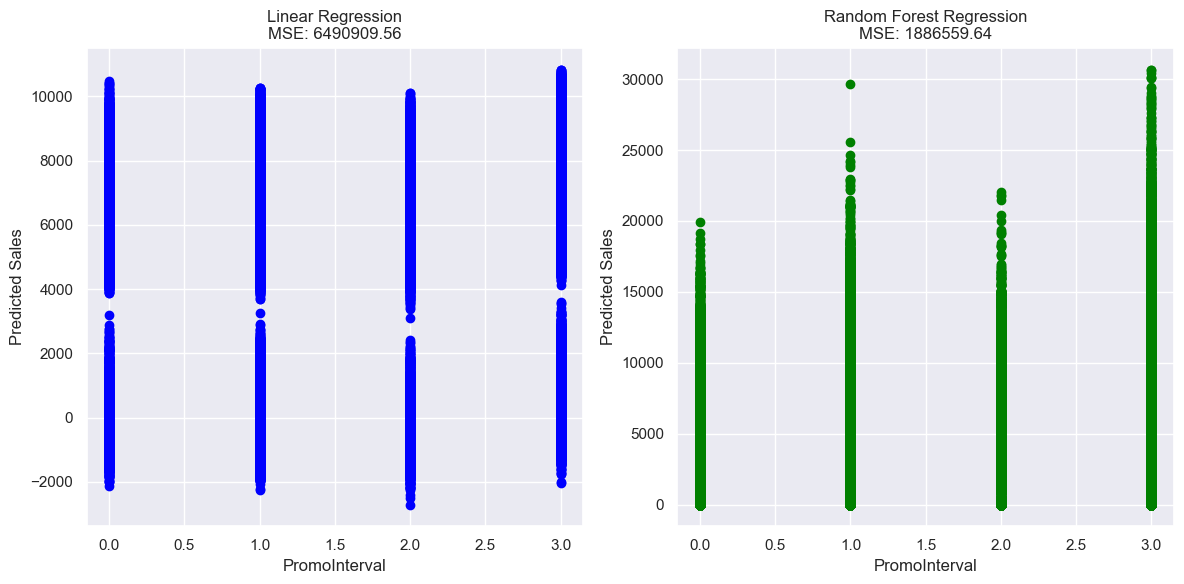

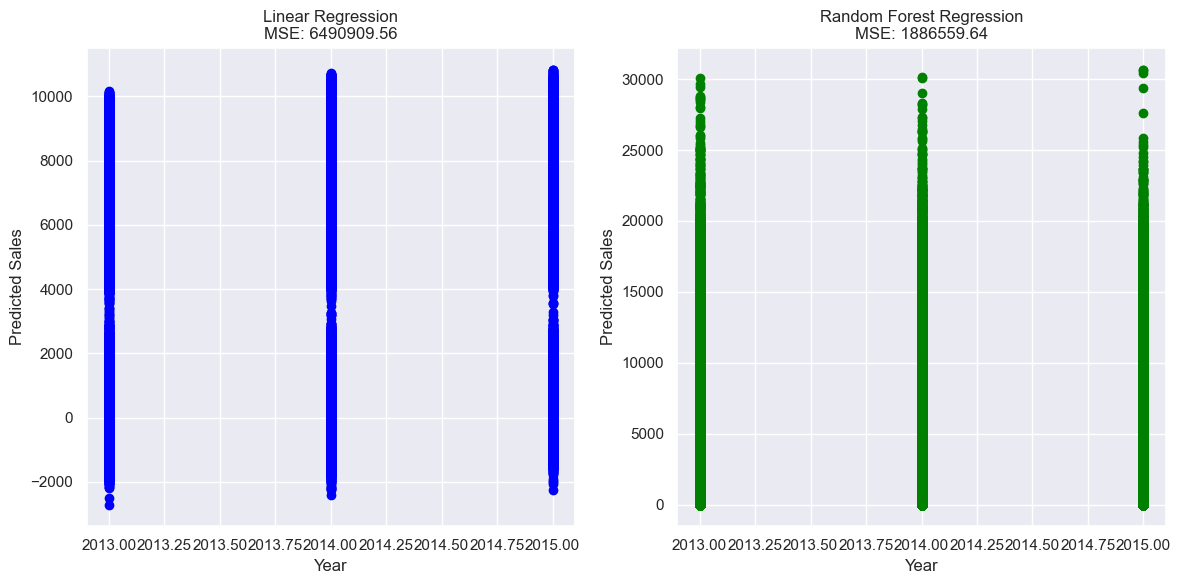

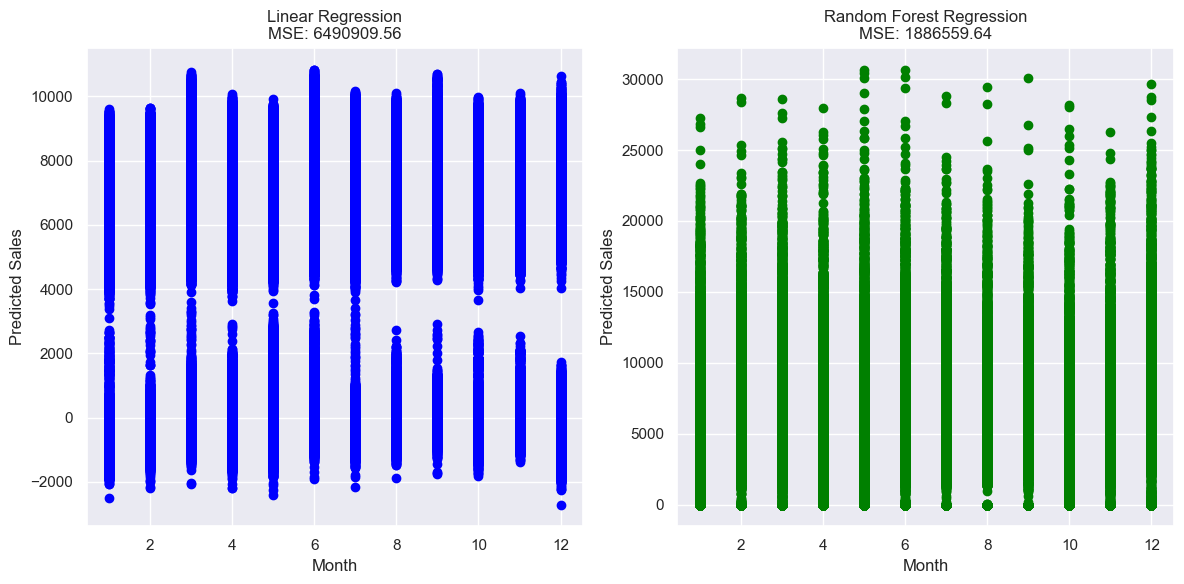

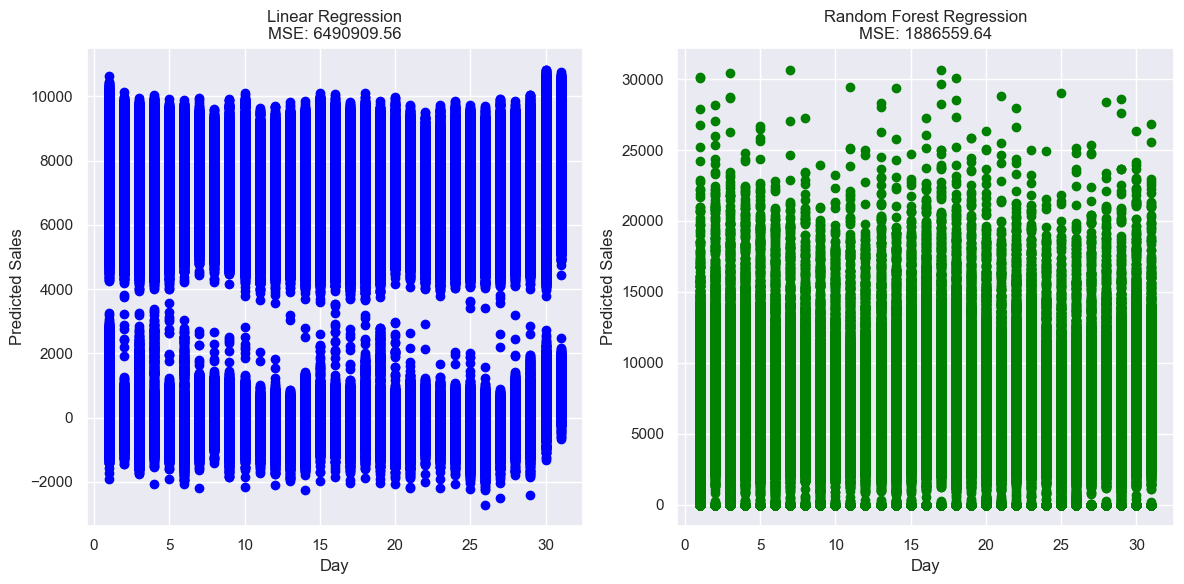

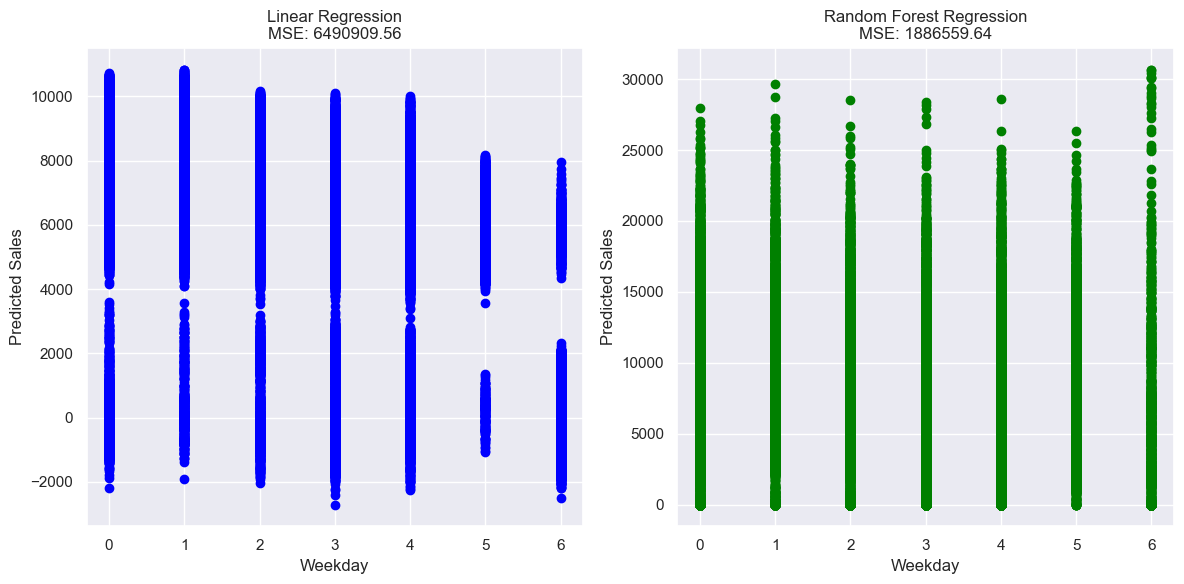

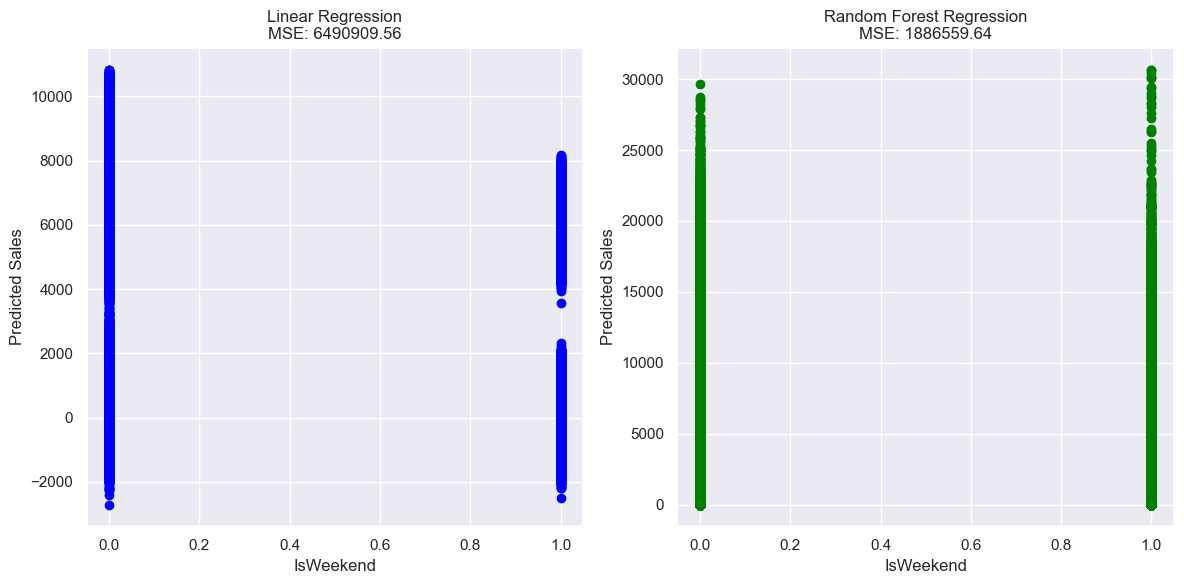

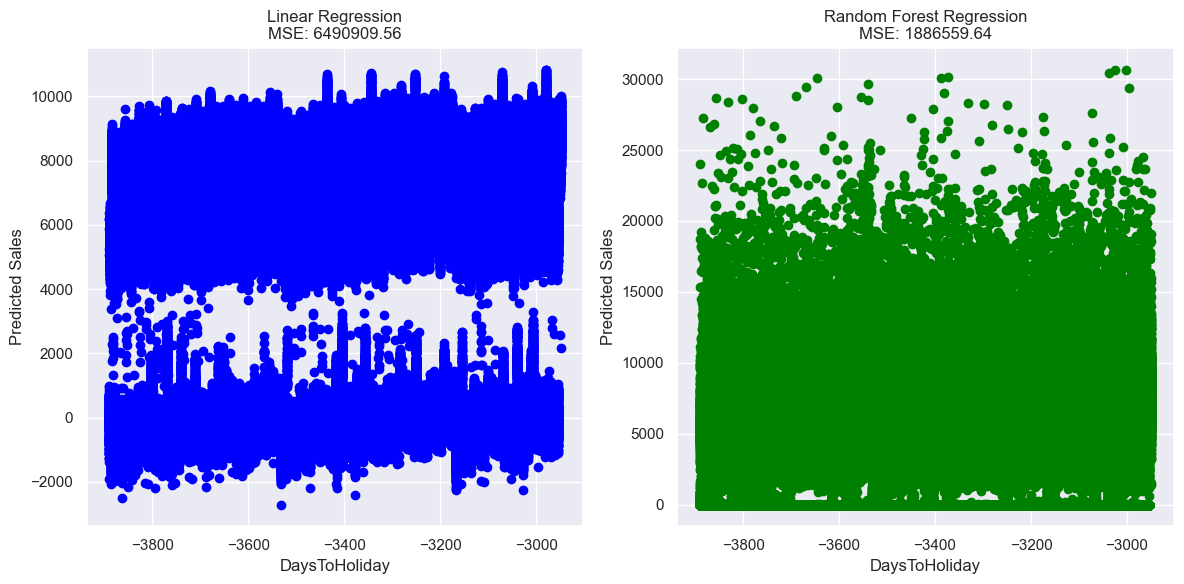

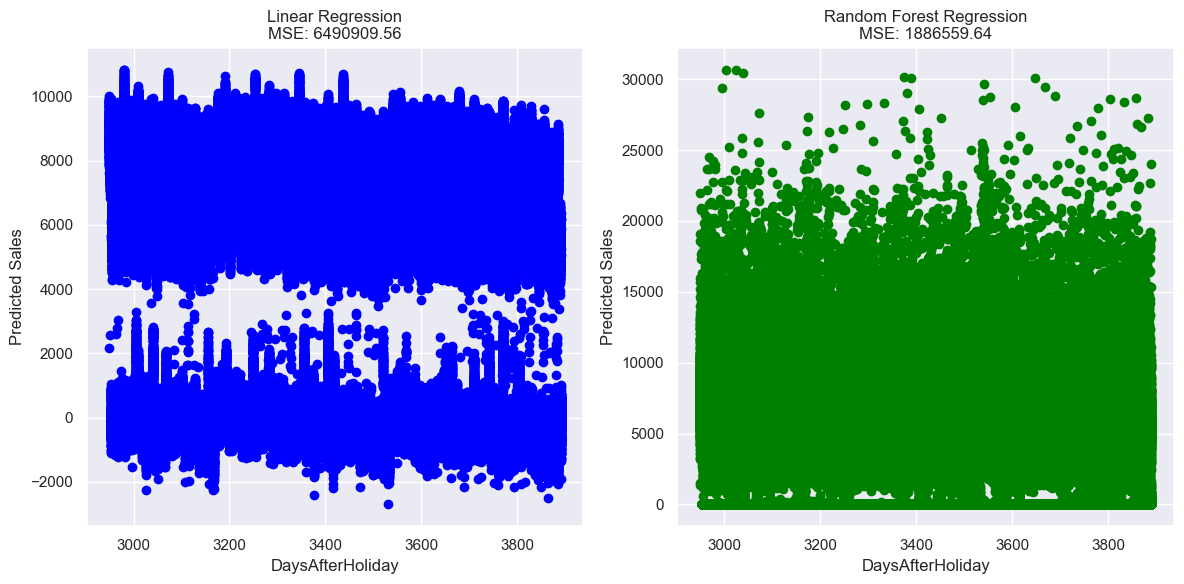

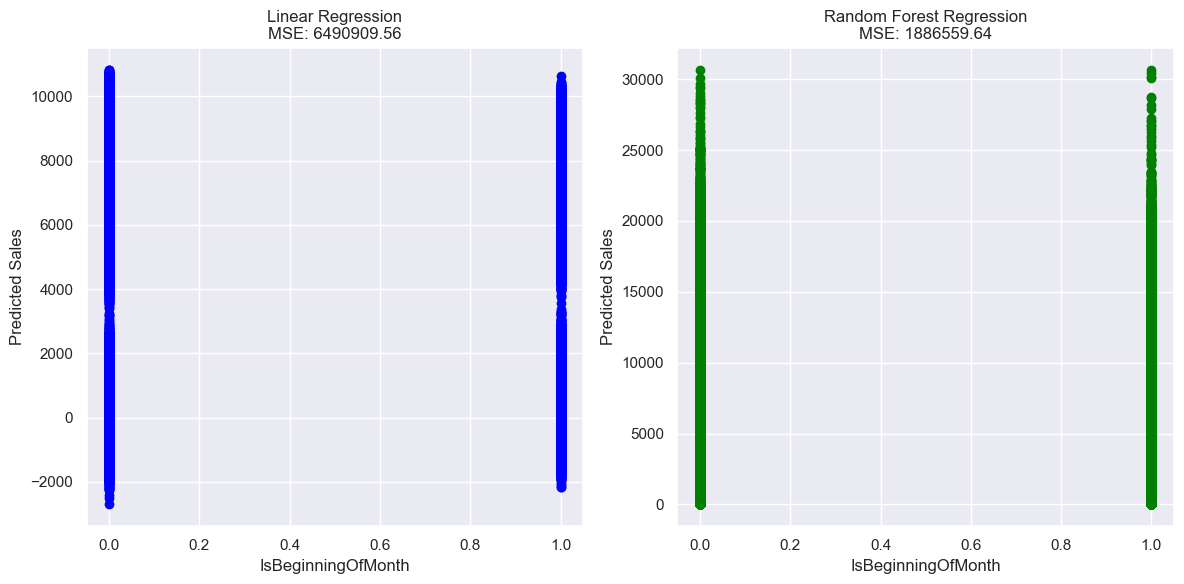

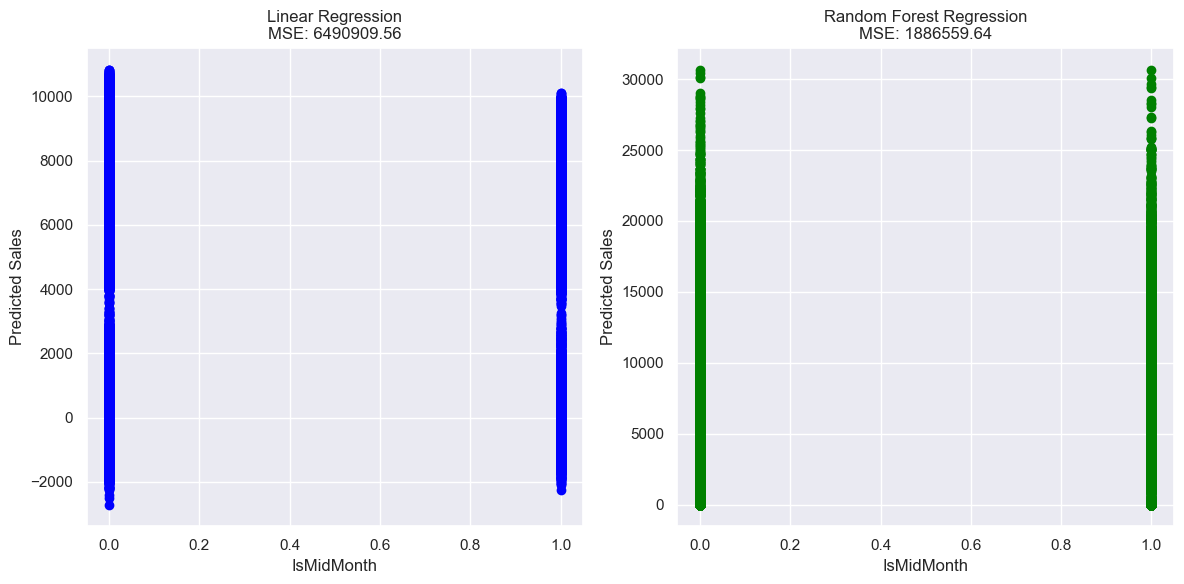

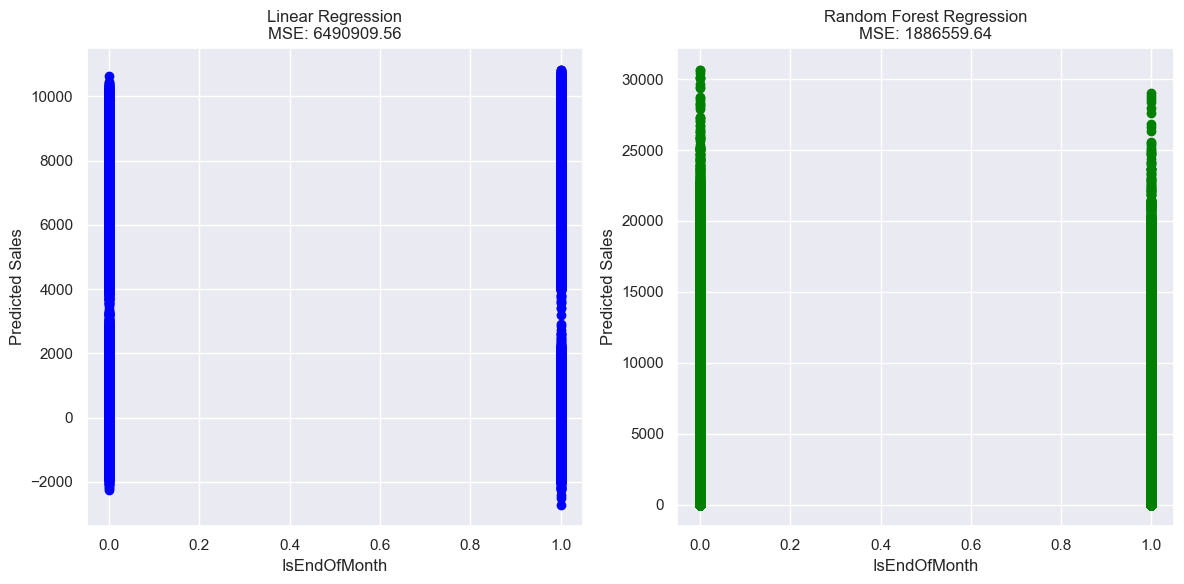

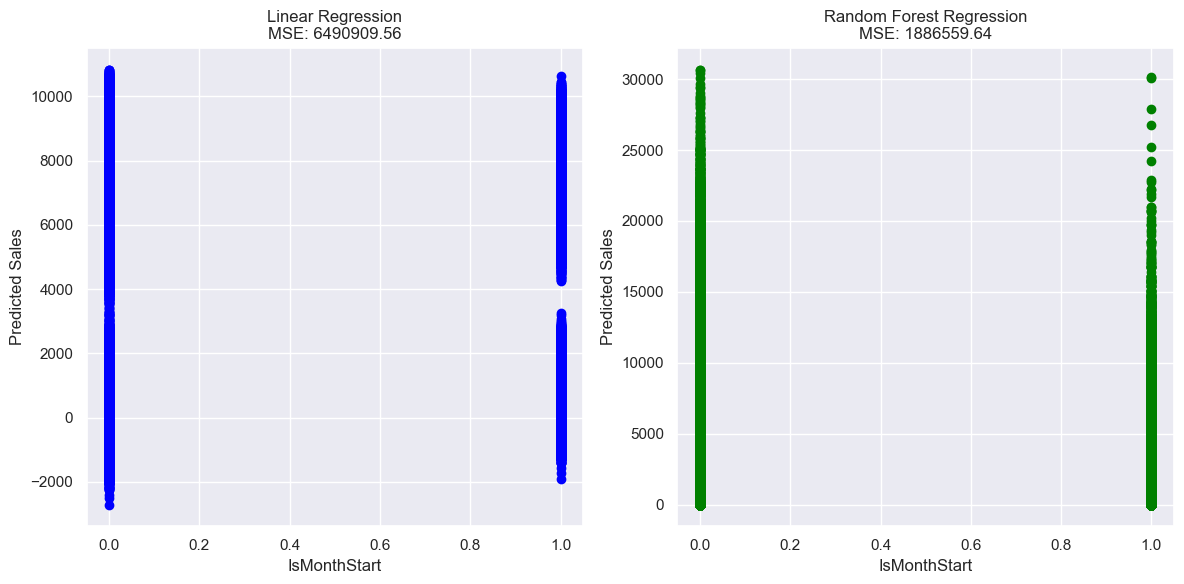

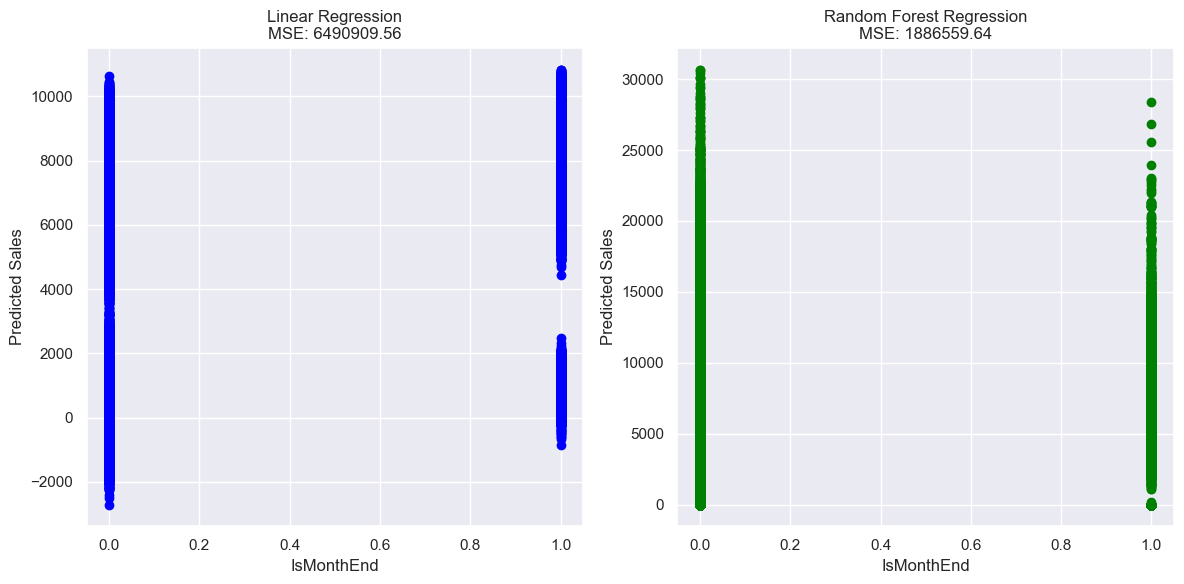

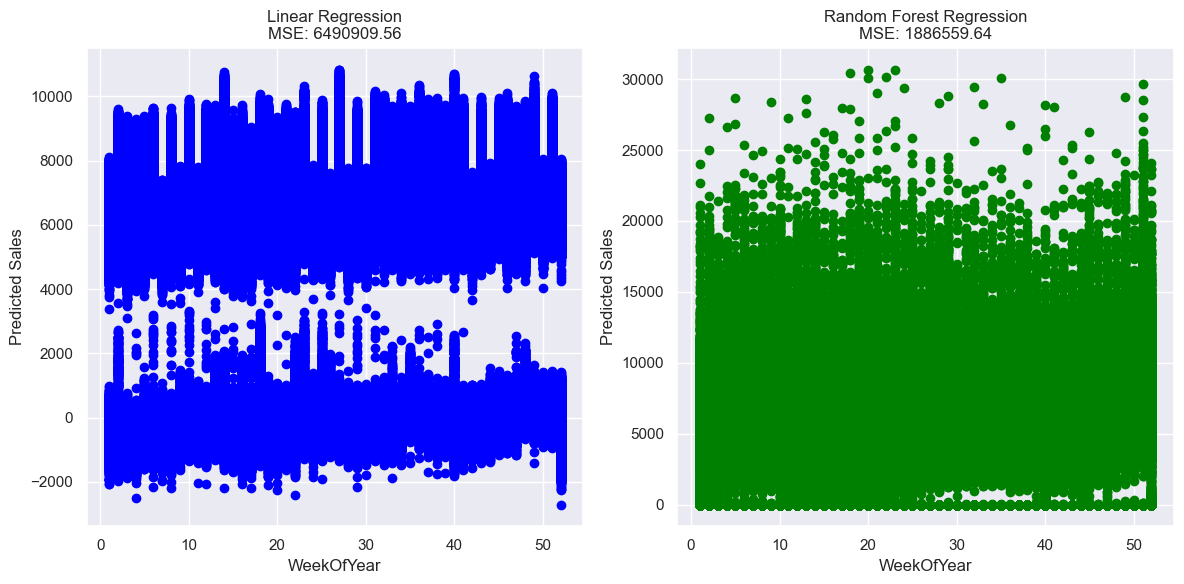

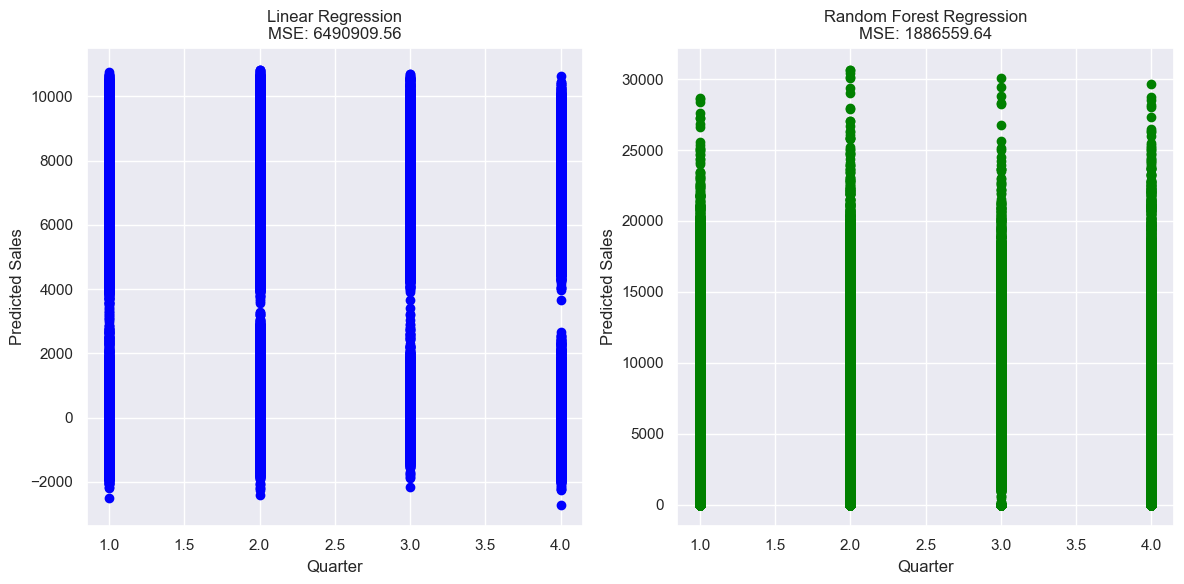

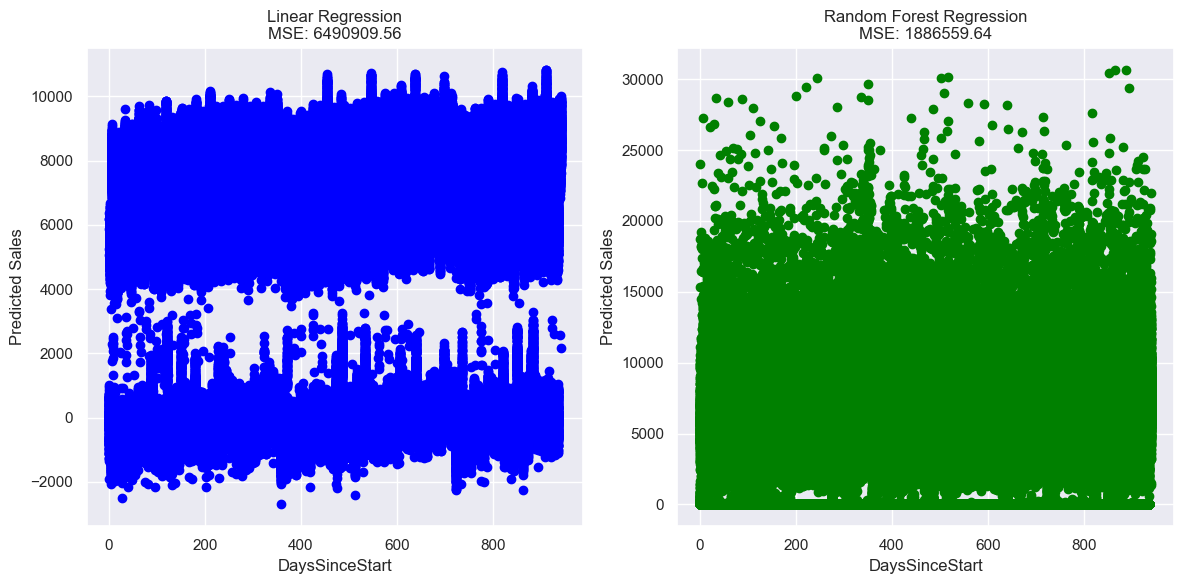

In [68]:
for attribute in X_val.columns:
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.scatter(X_val[attribute], y_pred_linear, color='blue')
    plt.xlabel(attribute)
    plt.ylabel('Predicted Sales')
    plt.title('Linear Regression\nMSE: {:.2f}'.format(mse_loss_linear))
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.scatter(X_val[attribute], y_pred_rf, color='green')
    plt.xlabel(attribute)
    plt.ylabel('Predicted Sales')
    plt.title('Random Forest Regression\nMSE: {:.2f}'.format(mse_loss_rf))
    plt.grid(True)

    plt.tight_layout()
    plt.show()




In [69]:
# Confidence intervals for predictions
val_predictions = pipeline.predict(X_val)
mse = mean_squared_error(y_val, val_predictions)
prediction_stddev = np.sqrt(mse)

confidence_interval = 1.96 * prediction_stddev  # 95% confidence interval

print(f"Confidence Interval for Predictions: +/- {confidence_interval:.2f}")

Confidence Interval for Predictions: +/- 2692.10


# 2.5 Serialize models

In [70]:
import pickle
from datetime import datetime

In [71]:
# Get the current timestamp
timestamp = datetime.now().strftime('%d-%m-%Y-%H-%M-%S-%f')

In [72]:
import joblib

model_filename = f"trained_model_{timestamp}.joblib"
with open(model_filename, 'wb') as file:
    joblib.dump(pipeline, file)
print(f"Model saved to {model_filename}")


Model saved to trained_model_29-08-2023-01-20-39-532101.joblib
